In [1]:
import pandas as pd
import os

In [10]:
data_path='../data/f1-data/'

csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
print("Available CSV files:", csv_files)

Available CSV files: ['circuits.csv', 'constructors.csv', 'constructor_results.csv', 'constructor_standings.csv', 'drivers.csv', 'driver_standings.csv', 'lap_times.csv', 'pit_stops.csv', 'qualifying.csv', 'races.csv', 'results.csv', 'seasons.csv', 'sprint_results.csv', 'status.csv']


In [ ]:
results = pd.read_csv(data_path + 'results.csv')
races = pd.read_csv(data_path + 'races.csv')
drivers = pd.read_csv(data_path + 'drivers.csv')
constructors = pd.read_csv(data_path + 'constructors.csv')

#display basic info for each file
print('=== Results ===')
print(results.info())
print("\nSample data (first 5 rows):")
print(results.head())



=== Results ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int64  
 1   raceId           26759 non-null  int64  
 2   driverId         26759 non-null  int64  
 3   constructorId    26759 non-null  int64  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int64  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int64  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int64  
 11  time             26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 

In [12]:
print("\n=== Races ===")
print(races.info())
print("\nSample data (first 5 rows):")
print(races.head())


=== Races ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int64 
 1   year         1125 non-null   int64 
 2   round        1125 non-null   int64 
 3   circuitId    1125 non-null   int64 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int64(4), object(14)
memory usage: 158.3+ KB
None


In [13]:
print("\n=== Drivers ===")
print(drivers.info())
print("\nSample data (first 5 rows):")
print(drivers.head())


=== Drivers ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int64 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.7+ KB
None

Sample data (first 5 rows):
   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      

In [14]:
print("\n=== Constructors ===")
print(constructors.info())
print("\nSample data (first 5 rows):")
print(constructors.head())


=== Constructors ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   212 non-null    int64 
 1   constructorRef  212 non-null    object
 2   name            212 non-null    object
 3   nationality     212 non-null    object
 4   url             212 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB
None

Sample data (first 5 rows):
   constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http

In [15]:
dfs = {
    'results' : results,
    'races'   : races,
    'drivers' :drivers,
    'constructors' : constructors
}



In [16]:
# Function to check for placeholders like \N, et, or others
def check_placeholders(df, df_name):
    print(f"\n=== Placeholder Analysis for {df_name} ===")
    for col in df.columns:
        # Check for \N in object/string columns
        if df[col].dtype == 'object':
            n_count = df[col].str.contains(r'\\N', na=False).sum()
            if n_count > 0:
                print(f"Column '{col}' has {n_count} '\\N' values")
        
        # Check for other suspicious placeholders (e.g., 'et')
        unique_vals = df[col].unique()
        suspicious = [val for val in unique_vals if isinstance(val, str) and val.lower() in ['et', 'null', 'n/a', 'unknown']]
        if suspicious:
            print(f"Column '{col}' has suspicious values: {suspicious}")
        
        # Report total unique values for context
        print(f"Column '{col}': {len(unique_vals)} unique values")

# Analyze placeholders in each dataframe
for name, df in dfs.items():
    check_placeholders(df, name)


=== Placeholder Analysis for results ===
Column 'resultId': 26759 unique values
Column 'raceId': 1125 unique values
Column 'driverId': 861 unique values
Column 'constructorId': 211 unique values
Column 'number' has 6 '\N' values
Column 'number': 130 unique values
Column 'grid': 35 unique values
Column 'position' has 10953 '\N' values
Column 'position': 34 unique values
Column 'positionText': 39 unique values
Column 'positionOrder': 39 unique values
Column 'points': 39 unique values
Column 'laps': 172 unique values
Column 'time' has 19079 '\N' values
Column 'time': 7411 unique values
Column 'milliseconds' has 19079 '\N' values
Column 'milliseconds': 7639 unique values
Column 'fastestLap' has 18507 '\N' values
Column 'fastestLap': 81 unique values
Column 'rank' has 18249 '\N' values
Column 'rank': 26 unique values
Column 'fastestLapTime' has 18507 '\N' values
Column 'fastestLapTime': 7474 unique values
Column 'fastestLapSpeed' has 18507 '\N' values
Column 'fastestLapSpeed': 7725 unique 

In [19]:
# Critical columns for podium prediction
critical_columns = {
    'results': ['raceId', 'driverId', 'constructorId', 'grid', 'position', 'positionText'],
    'races': ['raceId', 'year', 'name', 'circuitId'],
    'drivers': ['driverId', 'code', 'forename', 'surname'],
    'constructors': ['constructorId', 'name']
}

# Check placeholders in critical columns
print("\n=== Placeholders in Critical Columns ===")
for df_name, cols in critical_columns.items():
    df = dfs[df_name]
    print(f"\n{df_name.capitalize()}:")

    for col in cols:
        if df[col].dtype == 'object':
            n_count = df[col].str.contains(r'\\N', na=False).sum()
            if n_count > 0:
                print(f"Column '{col}' has {n_count} '\\N' values")
            suspicious = [val for val in df[col].unique() if isinstance(val, str) and val.lower() in ['et', 'null', 'n/a', 'unknown']]
            if suspicious:
                print(f"Column '{col}' has suspicious values: {suspicious}")
        else:
            # For numeric columns, check for unexpected zeros or negatives
            if df[col].dtype in ['int64', 'float64']:
                zero_count = (df[col] == 0).sum()
                negative_count = (df[col] < 0).sum()
                if zero_count > 0 or negative_count > 0:
                    print(f"Column '{col}' has {zero_count} zeros, {negative_count} negative values")


=== Placeholders in Critical Columns ===

Results:
Column 'grid' has 1638 zeros, 0 negative values
Column 'position' has 10953 '\N' values

Races:

Drivers:
Column 'code' has 757 '\N' values

Constructors:


In [20]:
# Summarize placeholder findings
print("\n=== Placeholder Summary ===")
print("Key columns likely affected by placeholders:")
print("- results.position and results.positionText: Likely '\\N' for DNFs (Did Not Finish) or disqualifications.")
print("- results.grid: Possible '\\N' or 0 for missing qualifying data.")
print("- drivers.code: Possible missing or '\\N' for older drivers without codes.")
print("Next steps:")
print("- Replace '\\N' in position with a high number (e.g., 99) or drop DNFs.")
print("- Replace '\\N' or 0 in grid with median qualifying position or a flag.")
print("- Investigate 'et' or other placeholders; may be typos or specific codes.")
print("- Consider external weather data, as not present in dataset.")


=== Placeholder Summary ===
Key columns likely affected by placeholders:
- results.position and results.positionText: Likely '\N' for DNFs (Did Not Finish) or disqualifications.
- results.grid: Possible '\N' or 0 for missing qualifying data.
- drivers.code: Possible missing or '\N' for older drivers without codes.
Next steps:
- Replace '\N' in position with a high number (e.g., 99) or drop DNFs.
- Replace '\N' or 0 in grid with median qualifying position or a flag.
- Investigate 'et' or other placeholders; may be typos or specific codes.
- Consider external weather data, as not present in dataset.


Visualize

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define path to dataset
data_path = '../data/f1-data/'

# Load key CSV files
results = pd.read_csv(data_path + 'results.csv')
races = pd.read_csv(data_path + 'races.csv')
drivers = pd.read_csv(data_path + 'drivers.csv')
constructors = pd.read_csv(data_path + 'constructors.csv')

# Merge datasets for visualization
df = results.merge(races[['raceId', 'year', 'name', 'circuitId']], on='raceId', how='left')
df = df.merge(drivers[['driverId', 'code']], on='driverId', how='left')
df = df.merge(constructors[['constructorId', 'name']], on='constructorId', how='left')

# Rename columns for clarity
df = df.rename(columns={
    'year': 'season',
    'name_x': 'race_name',
    'name_y': 'constructor',
    'code': 'driver',
    'grid': 'qualifying_position',
    'position': 'final_position'
})

# Filter for 2010–2024 (hybrid era)
df = df[df['season'].between(2010, 2024)]

# Create podium column (1 for top 3, 0 otherwise)
# Handle \N in position by checking positionText
df['podium'] = df['positionText'].apply(lambda x: 1 if x in ['1', '2', '3'] else 0)

# Save merged data for reference (optional)
df.to_csv('../data/f1_race_results_temp.csv', index=False)
print("Merged data shape:", df.shape)

Merged data shape: (6436, 24)


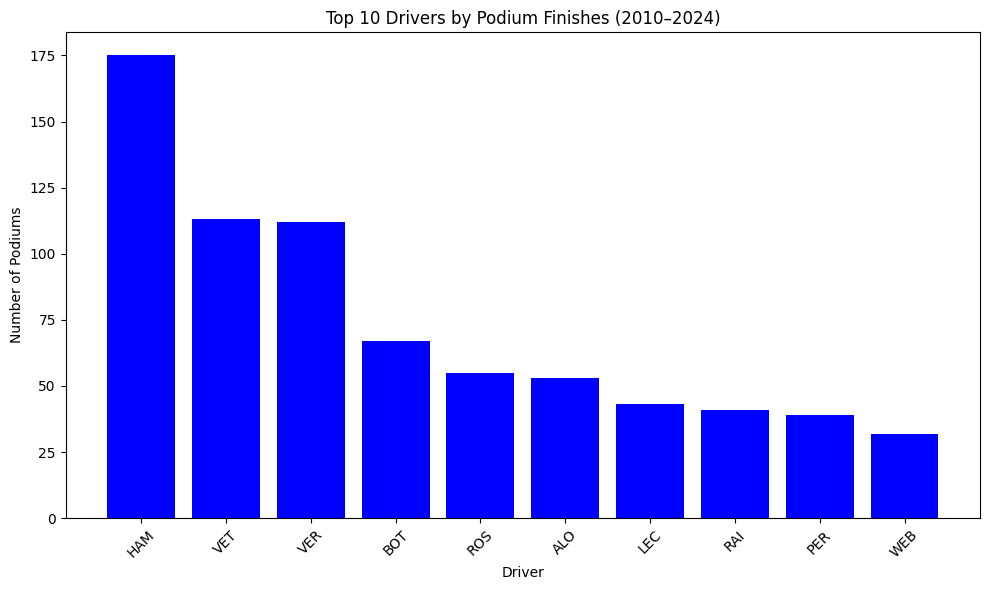

In [26]:
# Driver-wise podium counts
driver_podiums = df[df['podium'] == 1]['driver'].value_counts().head(10)  # Top 10 drivers

plt.figure(figsize=(10, 6))
plt.bar(driver_podiums.index, driver_podiums.values, color='blue')
plt.title('Top 10 Drivers by Podium Finishes (2010–2024)')
plt.xlabel('Driver')
plt.ylabel('Number of Podiums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visualizations/driver_podiums.png')
plt.show()

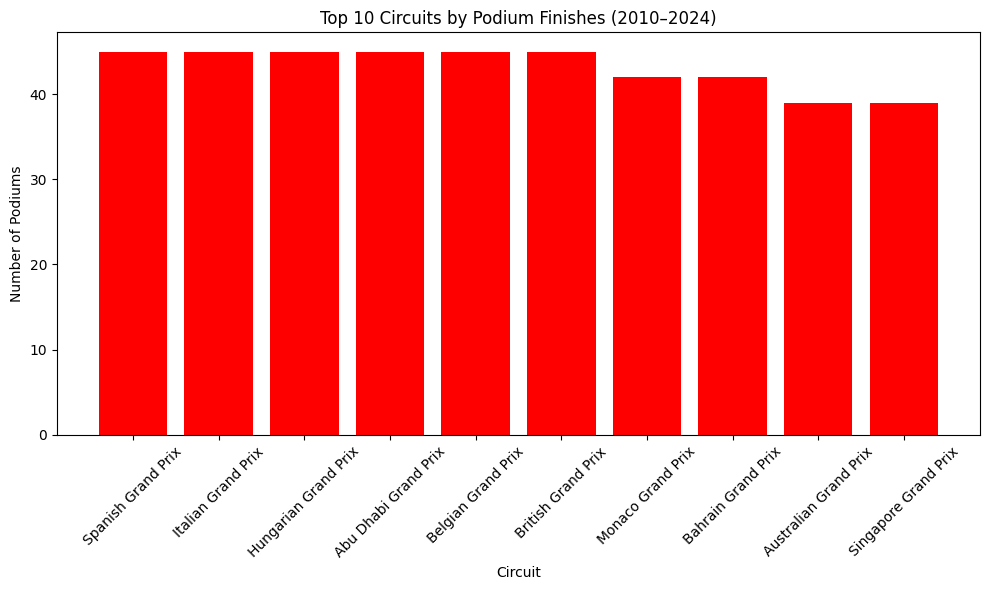

In [28]:
# Podium counts by circuit
circuit_podiums = df[df['podium'] == 1]['race_name'].value_counts().head(10)  # Top 10 circuits

plt.figure(figsize=(10, 6))
plt.bar(circuit_podiums.index, circuit_podiums.values, color='red')
plt.title('Top 10 Circuits by Podium Finishes (2010–2024)')
plt.xlabel('Circuit')
plt.ylabel('Number of Podiums')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visualizations/circuit_podiums.png')
plt.show()